# DAKTARI- THE AI MEDICAL CHATBOT

# PROJECT SUMMARY

# 1. BUSINESS UNDERSTANDING

# 2. BUSINESS PROBLEM

# 3. OBJECTIVES

## 3.1 Main objective

## 3.2 Specific objective

## 3.3 Research Questions

## 3.4 Metric of success

# 4. DATA UNDERSTANDING

## 4.1 Data Limitation

# 5. DATA EXPLORATION

## 5.1 Loading a Dataset

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# pip install huggingface_hub


In [3]:
df = pd.read_parquet("hf://datasets/DrBenjamin/ai-medical-chatbot/dialogues.parquet")
df.head()

,Description,Patient,Doctor
0,Q. What does abutment of the nerve root mean?,"Hi doctor,I am just wondering what is abutting...",Hi. I have gone through your query with dilige...
1,Q. What should I do to reduce my weight gained...,"Hi doctor, I am a 22-year-old female who was d...",Hi. You have really done well with the hypothy...
2,Q. I have started to get lots of acne on my fa...,Hi doctor! I used to have clear skin but since...,Hi there Acne has multifactorial etiology. Onl...
3,Q. Why do I have uncomfortable feeling between...,"Hello doctor,I am having an uncomfortable feel...",Hello. The popping and discomfort what you fel...
4,Q. My symptoms after intercourse threatns me e...,"Hello doctor,Before two years had sex with a c...",Hello. The HIV test uses a finger prick blood ...


In [4]:
df.shape

(256916, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256916 entries, 0 to 256915
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Description  256916 non-null  object
 1   Patient      256916 non-null  object
 2   Doctor       256916 non-null  object
dtypes: object(3)
memory usage: 5.9+ MB


In [6]:
df.isnull().sum()

Description    0
Patient        0
Doctor         0
dtype: int64

Since our data is not missing any missing values we can move to cleaning the text.

## 5.2 Data Cleaning

In [7]:
import nltk # natural language toolkit
import re # regular expressions
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### 5.2.1 Text preprocessing

In [9]:
df.columns

Index(['Description', 'Patient', 'Doctor'], dtype='object')

**Lowercasing**

Let's convert our tokenized text to **lowercase** to ensure consistency in our data.

In [ ]:
# Safely ensure cleaned token columns exist, then convert tokens to lowercase.
# If a cleaned column already exists and contains token lists, lowercase each token.
# If the cleaned column does not exist, create it by tokenizing the original column and lowercasing.
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: [word.lower() for word in x] if isinstance(x, (list, tuple)) else str(x).lower())
    else:
        orig_col = col.replace('_cleaned', '')
        # word_tokenize was already imported earlier in the notebook
        df[col] = df[orig_col].astype(str).apply(word_tokenize).apply(lambda tokens: [w.lower() for w in tokens])

df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()


**Stopword Removal**

By removing **Stopwords** like *the, is, and*   which don’t really  carry meaningful information we reduce the noise in our data.

In [ ]:
words_to_remove = ['hi', 'hello', 'doctor', 'thanks', 'thank', 'please', 'kindly','q','but']
stop_words = set(stopwords.words('english')+ words_to_remove)

# Remove stopwords
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    df[col] = df[col].apply(lambda x: [word for word in x if word not in stop_words])

df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()

,Description_cleaned,Patient_cleaned,Doctor_cleaned
0,"[., abutment, nerve, root, mean, ?]","[,, wondering, abutting, abutment, nerve, root...","[., gone, query, diligence, would, like, know,..."
1,"[., reduce, weight, gained, due, genetic, hypo...","[,, 22-year-old, female, diagnosed, hypothyroi...","[., really, done, well, hypothyroidism, proble..."
2,"[q., started, get, lots, acne, face, ,, partic...","[!, used, clear, skin, since, moved, new, plac...","[acne, multifactorial, etiology, ., acne, soap..."
3,"[., uncomfortable, feeling, middle, spine, lef...","[,, uncomfortable, feeling, middle, spine, lef...","[., popping, discomfort, felt, either, imprope..."
4,"[., symptoms, intercourse, threatns, even, neg...","[,, two, years, sex, call, girl, dark, locatio...","[., hiv, test, uses, finger, prick, blood, sam..."


In [ ]:
# Remove punctuation
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    df[col] = df[col].apply(lambda x: [word for word in x if word not in string.punctuation])

df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()


,Description_cleaned,Patient_cleaned,Doctor_cleaned
0,"[abutment, nerve, root, mean]","[wondering, abutting, abutment, nerve, root, m...","[gone, query, diligence, would, like, know, he..."
1,"[reduce, weight, gained, due, genetic, hypothy...","[22-year-old, female, diagnosed, hypothyroidis...","[really, done, well, hypothyroidism, problem, ..."
2,"[q., started, get, lots, acne, face, particula...","[used, clear, skin, since, moved, new, place, ...","[acne, multifactorial, etiology, acne, soap, i..."
3,"[uncomfortable, feeling, middle, spine, left, ...","[uncomfortable, feeling, middle, spine, left, ...","[popping, discomfort, felt, either, improper, ..."
4,"[symptoms, intercourse, threatns, even, negati...","[two, years, sex, call, girl, dark, location, ...","[hiv, test, uses, finger, prick, blood, sample..."


**Stemming and Lemmatization**

**Stemming** reduces words to their base forms e.g running to run.

**Lemmatization** refines this using linguistic context better to good.
Both this steps will help us unify variations of the same word.

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply to each column
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    df[col] = df[col].apply(lemmatize_tokens)

df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()

,Description_cleaned,Patient_cleaned,Doctor_cleaned
0,"[abutment, nerve, root, mean]","[wondering, abutting, abutment, nerve, root, m...","[gone, query, diligence, would, like, know, he..."
1,"[reduce, weight, gained, due, genetic, hypothy...","[22-year-old, female, diagnosed, hypothyroidis...","[really, done, well, hypothyroidism, problem, ..."
2,"[q., started, get, lot, acne, face, particular...","[used, clear, skin, since, moved, new, place, ...","[acne, multifactorial, etiology, acne, soap, i..."
3,"[uncomfortable, feeling, middle, spine, left, ...","[uncomfortable, feeling, middle, spine, left, ...","[popping, discomfort, felt, either, improper, ..."
4,"[symptom, intercourse, threatns, even, negativ...","[two, year, sex, call, girl, dark, location, 1...","[hiv, test, us, finger, prick, blood, sample, ..."


**Tokenization**

Let's breaks down each text into a list of words **tokens**

In [ ]:
# Apply tokenization to each text column
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    df[col + '_cleaned'] = df[col].astype(str).apply(word_tokenize)

df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Description_cleaned,Patient_cleaned,Doctor_cleaned
0,"[abutment, nerve, root, mean]","[wondering, abutting, abutment, nerve, root, m...","[gone, query, diligence, would, like, know, he..."
1,"[reduce, weight, gained, due, genetic, hypothy...","[22-year-old, female, diagnosed, hypothyroidis...","[really, done, well, hypothyroidism, problem, ..."
2,"[q., started, get, lot, acne, face, particular...","[used, clear, skin, since, moved, new, place, ...","[acne, multifactorial, etiology, acne, soap, i..."
3,"[uncomfortable, feeling, middle, spine, left, ...","[uncomfortable, feeling, middle, spine, left, ...","[popping, discomfort, felt, either, improper, ..."
4,"[symptom, intercourse, threatns, even, negativ...","[two, year, sex, call, girl, dark, location, 1...","[hiv, test, us, finger, prick, blood, sample, ..."


**Punctuation Removal**

Removing punctuation marks like *!, ., ,*  because they rarely add semantic meaning in our text analyses.

In [ ]:
# Apply tokenization to each text column
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
for col in ['Description', 'Patient', 'Doctor']:
    df[col + '_cleaned'] = df[col].astype(str).apply(word_tokenize)

df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Description_cleaned,Patient_cleaned,Doctor_cleaned
0,"[Q, ., What, does, abutment, of, the, nerve, r...","[Hi, doctor, ,, I, am, just, wondering, what, ...","[Hi, ., I, have, gone, through, your, query, w..."
1,"[Q, ., What, should, I, do, to, reduce, my, we...","[Hi, doctor, ,, I, am, a, 22-year-old, female,...","[Hi, ., You, have, really, done, well, with, t..."
2,"[Q., I, have, started, to, get, lots, of, acne...","[Hi, doctor, !, I, used, to, have, clear, skin...","[Hi, there, Acne, has, multifactorial, etiolog..."
3,"[Q, ., Why, do, I, have, uncomfortable, feelin...","[Hello, doctor, ,, I, am, having, an, uncomfor...","[Hello, ., The, popping, and, discomfort, what..."
4,"[Q, ., My, symptoms, after, intercourse, threa...","[Hello, doctor, ,, Before, two, years, had, se...","[Hello, ., The, HIV, test, uses, a, finger, pr..."


**Text Normalization**

Finally, we normalize the text by joining the processed tokens back into sentences.

In [ ]:

# Convert token lists to cleaned strings
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    df[col.replace('_tokens', '_cleaned')] = df[col].apply(lambda x: ' '.join(x))

# Display the first few rows
df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()

,Description_cleaned,Patient_cleaned,Doctor_cleaned
0,Q . What does abutment of the nerve root mean ?,"Hi doctor , I am just wondering what is abutti...",Hi . I have gone through your query with dilig...
1,Q . What should I do to reduce my weight gaine...,"Hi doctor , I am a 22-year-old female who was ...",Hi . You have really done well with the hypoth...
2,Q. I have started to get lots of acne on my fa...,Hi doctor ! I used to have clear skin but sinc...,Hi there Acne has multifactorial etiology . On...
3,Q . Why do I have uncomfortable feeling betwee...,"Hello doctor , I am having an uncomfortable fe...",Hello . The popping and discomfort what you fe...
4,Q . My symptoms after intercourse threatns me ...,"Hello doctor , Before two years had sex with a...",Hello . The HIV test uses a finger prick blood...


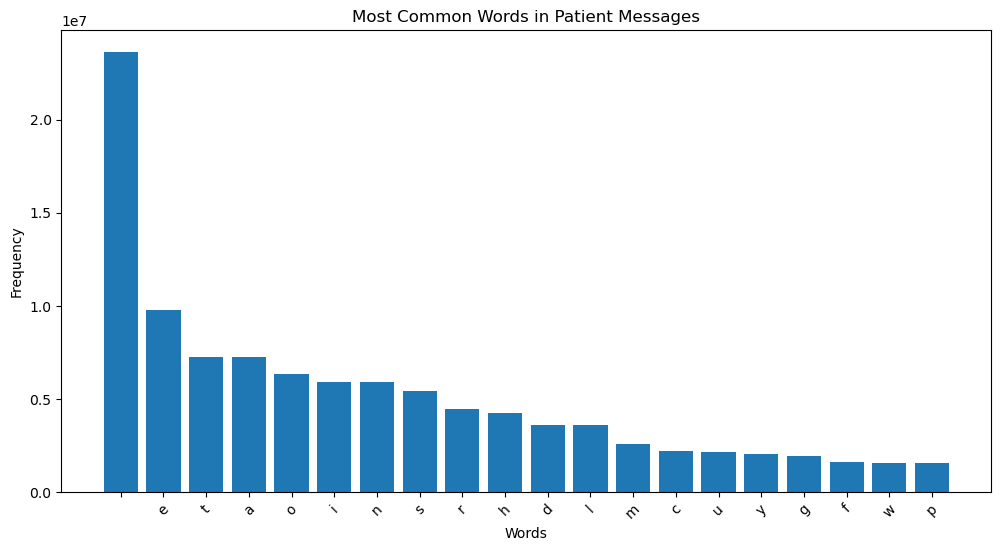

In [ ]:
### **Exploratory Data Analysis (EDA)**
# Word Frequency Distribution for Patient messages
all_patient_words = [word for tokens in df['Patient_cleaned'] for word in tokens]
freq_dist_patient = FreqDist(all_patient_words)
most_common_patient = freq_dist_patient.most_common(20)
# Plotting the most common words
words, counts = zip(*most_common_patient)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title('Most Common Words in Patient Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



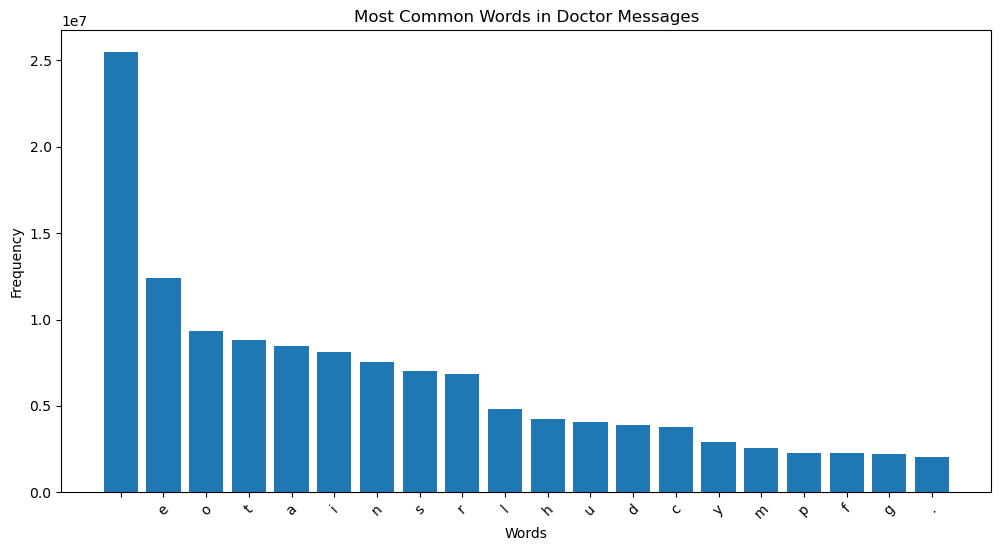

In [ ]:
# Word Frequency Distribution for Doctor messages
all_doctor_words = [word for tokens in df['Doctor_cleaned'] for word in tokens]
freq_dist_doctor = FreqDist(all_doctor_words)
most_common_doctor = freq_dist_doctor.most_common(20)
# Plotting the most common words
words, counts = zip(*most_common_doctor)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title('Most Common Words in Doctor Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

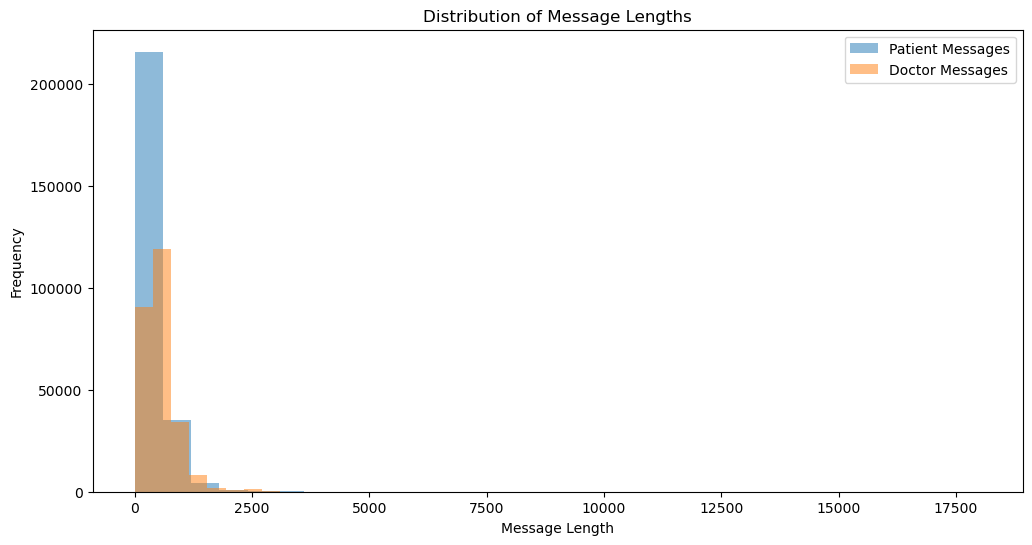

In [ ]:

### **Visualization of Message Lengths**
# Calculate message lengths
df['Patient_msg_length'] = df['Patient_cleaned'].apply(len)
df['Doctor_msg_length'] = df['Doctor_cleaned'].apply(len)

# Plotting the message lengths
plt.figure(figsize=(12, 6))
plt.hist(df['Patient_msg_length'], bins=30, alpha=0.5, label='Patient Messages')
plt.hist(df['Doctor_msg_length'], bins=30, alpha=0.5, label='Doctor Messages')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


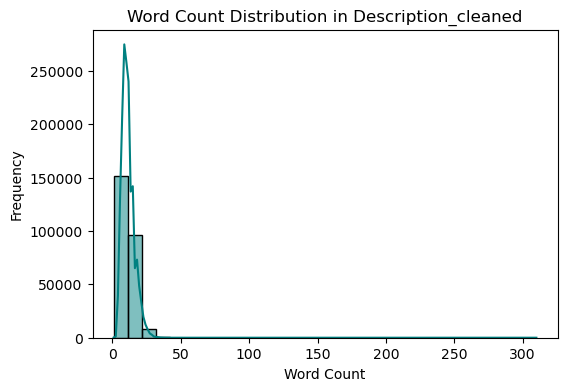

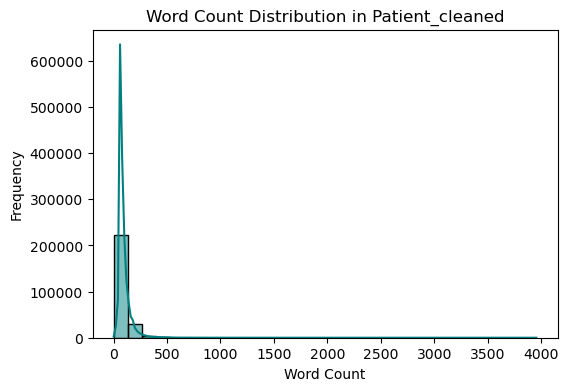

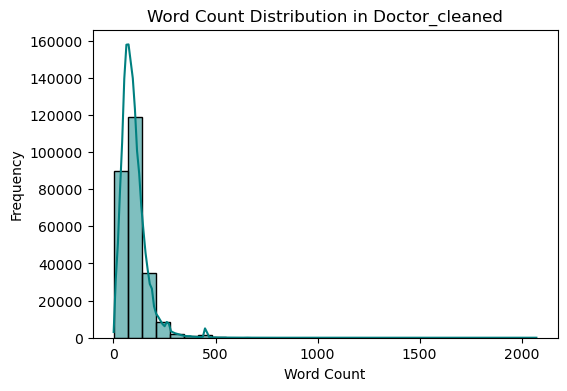

In [ ]:
# Create new columns for text length in words
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    df[col + '_length'] = df[col].apply(lambda x: len(str(x).split()))

# Plot word count distribution for each text column
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col + '_length'], bins=30, kde=True, color='teal')
    plt.title(f"Word Count Distribution in {col}")
    plt.xlabel("Word Count")
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
# ploting common pair of words in patient and doctor messages



In [ ]:
from nltk import pos_tag  # Import the pos_tag function

# Convert string to list of tokens before pos tagging
text = "Your input string here"
tokens = text.split()  # Split string into list of words
tagged = pos_tag(tokens)  # Now passing a list of strings

In [ ]:
from nltk import pos_tag
from nltk.corpus import wordnet
#POS tagging
def get_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,  # Represents an Adjective
        'N': wordnet.NOUN, # Represents a Noun
        'V': wordnet.VERB, # Represents a Verb
        'R': wordnet.ADV   # Represents an Adverb
    }
    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

In [ ]:
tumia hii don't use this other one lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    if not isinstance(tokens, list):
        return []
    tagged = pos_tag(tokens)  # tag once per sentence
    return [lemmatizer.lemmatize(word, nltk_to_wordnet(tag)) for word, tag in tagged]

# Apply to each column
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    df[col] = df[col].apply(lemmatize_tokens)

df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()